# Multiple Linear Regression Analysis

## Task Description

Our task is to perform a multiple linear regression analysis to predict the price of a Toyota Corolla based on the given attributes.

### Dataset Description


    The dataset consists of the following variables:
    - `Price`: Offer price in EUROs
    - `Age_08_04`: Age in months
    - `KM`: Accumulated kilometers on the odometer
    - `Fuel_Type`: Fuel type (Petrol, Diesel, CNG)
    - `HP`: Horsepower
    - `Automatic`: Automatic transmission (Yes=1, No=0)
    - `cc`: Cylinder volume in cubic centimeters
    - `Doors`: Number of doors
    - `Cylinders`: Number of cylinders
    - `Gears`: Number of gears
    - `Weight`: Weight in kilograms
    

## Step 1: Exploratory Data Analysis (EDA)

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"E:\Data Science Course\Completed Data Science Assignments\ToyotaCorolla - MLR.csv")

# Display the first few rows of the dataset
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


### Summary Statistics

In [20]:
# Summary statistics for the dataset
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


**The dataset consists of 1,436 car records with the following key statistics:**

- Price: Ranges from $4,350 to $32,500, with an average of $10,730.
- Age (in months): Cars are typically around 4.7 years old, with some as new as 1 month and others up to 6.7 years.
- KM (mileage): Average mileage is 68,533 km, with a wide range from 1 km to 243,000 km.
- HP (horsepower): Cars have an average horsepower of 101, ranging from 69 to 192.
- Automatic Transmission: Only 5.6% of the cars have automatic transmission.
- Engine Size (cc): The mean engine size is 1,577 cc, with a significant outlier at 16,000 cc.
- Doors and Cylinders: Most cars have 4 doors and 4 cylinders.
- Gears: Predominantly 5 gears, with some cars having 3 or 6 gears.
- Weight: Average weight is 1,072 kg, with a range from 1,000 to 1,615 kg.

### Data Preprocessing

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [22]:
# Data preprocessing steps
# Handling missing values
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

 - There are no null values in any column of the Dataset
 - All the variables are of numeric type except 'fuel_type', so we have to apply onehot encodding on fuel_type

In [23]:
# Renaming the column
data.rename(columns={'Age_08_04': 'Age_in_Months'}, inplace=True)

In [24]:
# Convert categorical variables into numerical form (e.g., one-hot encoding for Fuel_Type)
data = pd.get_dummies(data, columns=['Fuel_Type'], dtype=int)

# Display the first few rows after encoding
data.head()

,Price,Age_in_Months,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0


### Visualizations

#### Histogram to check distribution

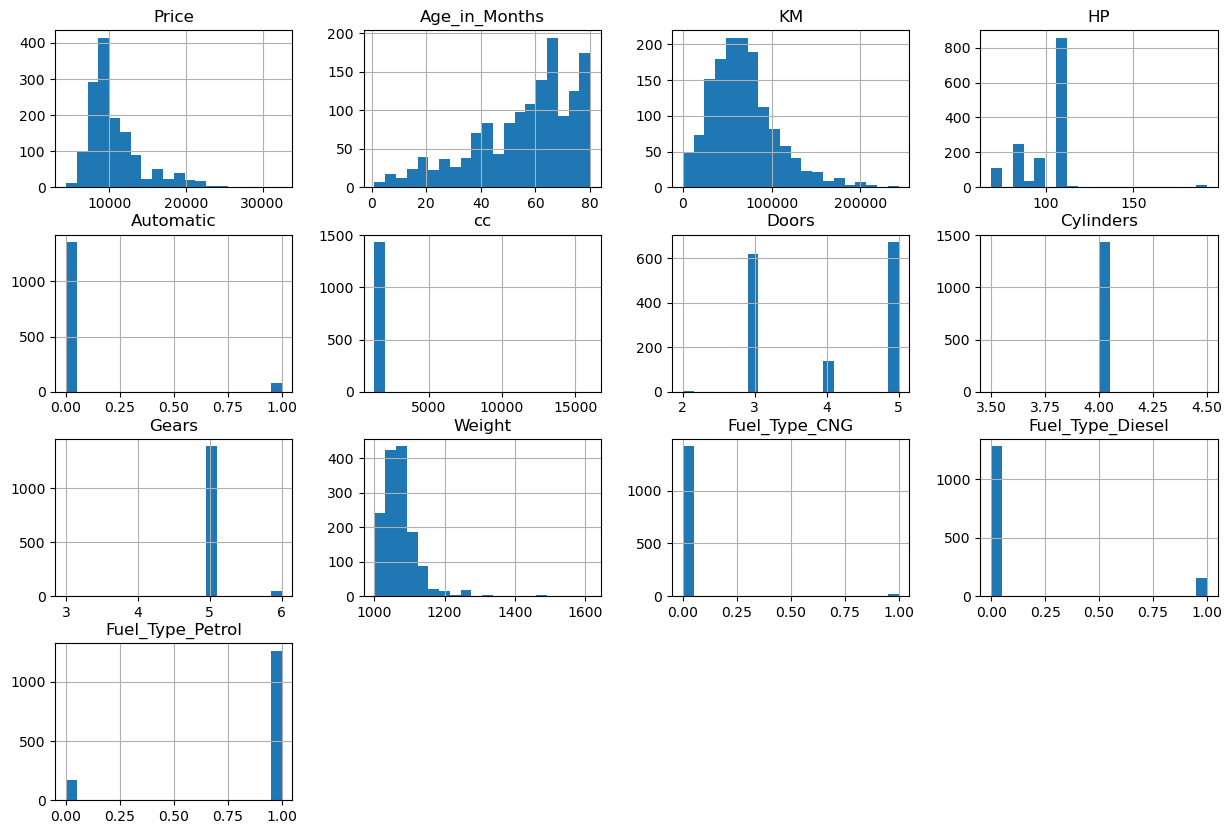

In [25]:
# Visualizations
# Histograms for continuous variables
data.hist(bins=20, figsize=(15, 10))
plt.show()

#### Insights

**1. Price Distribution:**
   - The majority of the cars are priced below \$20,000, with a right-skewed distribution indicating fewer higher-priced vehicles.

**2. Age Distribution:**
   - Most cars are between 40 to 80 months old, showing a relatively normal distribution, with a peak around 60 months.

**3. KM (Mileage):**
   - The mileage distribution is also right-skewed, with most cars having less than 150,000 km, but a few have much higher mileage.

**4. HP (Horsepower):**
   - A large concentration of cars has around 100-110 HP, with fewer cars having higher horsepower.

**5. Automatic Transmission:**
   - The vast majority of cars are not automatic (0), with a small number having automatic transmission (1).

**6. Engine Size (cc):**
   - The cc histogram shows a significant outlier, likely representing a small number of vehicles with much larger engines.

**7. Doors:**
   - Most cars have either 4 or 5 doors, indicating a dominance of typical family and utility vehicles.

**8. Cylinders:**
   - The dataset seems to contain vehicles with predominantly 4 cylinders.

**9. Gears:**
   - Most cars have 5 gears, with very few having 4 or 6.

**10. Weight:**
   - The weight distribution is slightly right-skewed, with most cars weighing between 1,000 and 1,200 kg.

**11. Fuel Types:**
   - `Fuel_Type_Petrol` dominates the dataset, followed by `Fuel_Type_Diesel` and `Fuel_Type_CNG` with much fewer counts.

These insights highlight the diversity in the dataset, with certain features like price, mileage, and horsepower showing variability, while others like transmission type and fuel type show more concentration in specific categories.

In [26]:
numerical_col = data.select_dtypes('Int64').columns
numerical_col

Index(['Price', 'Age_in_Months', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

#### Boxplot to detect outliers in different variables of dataset

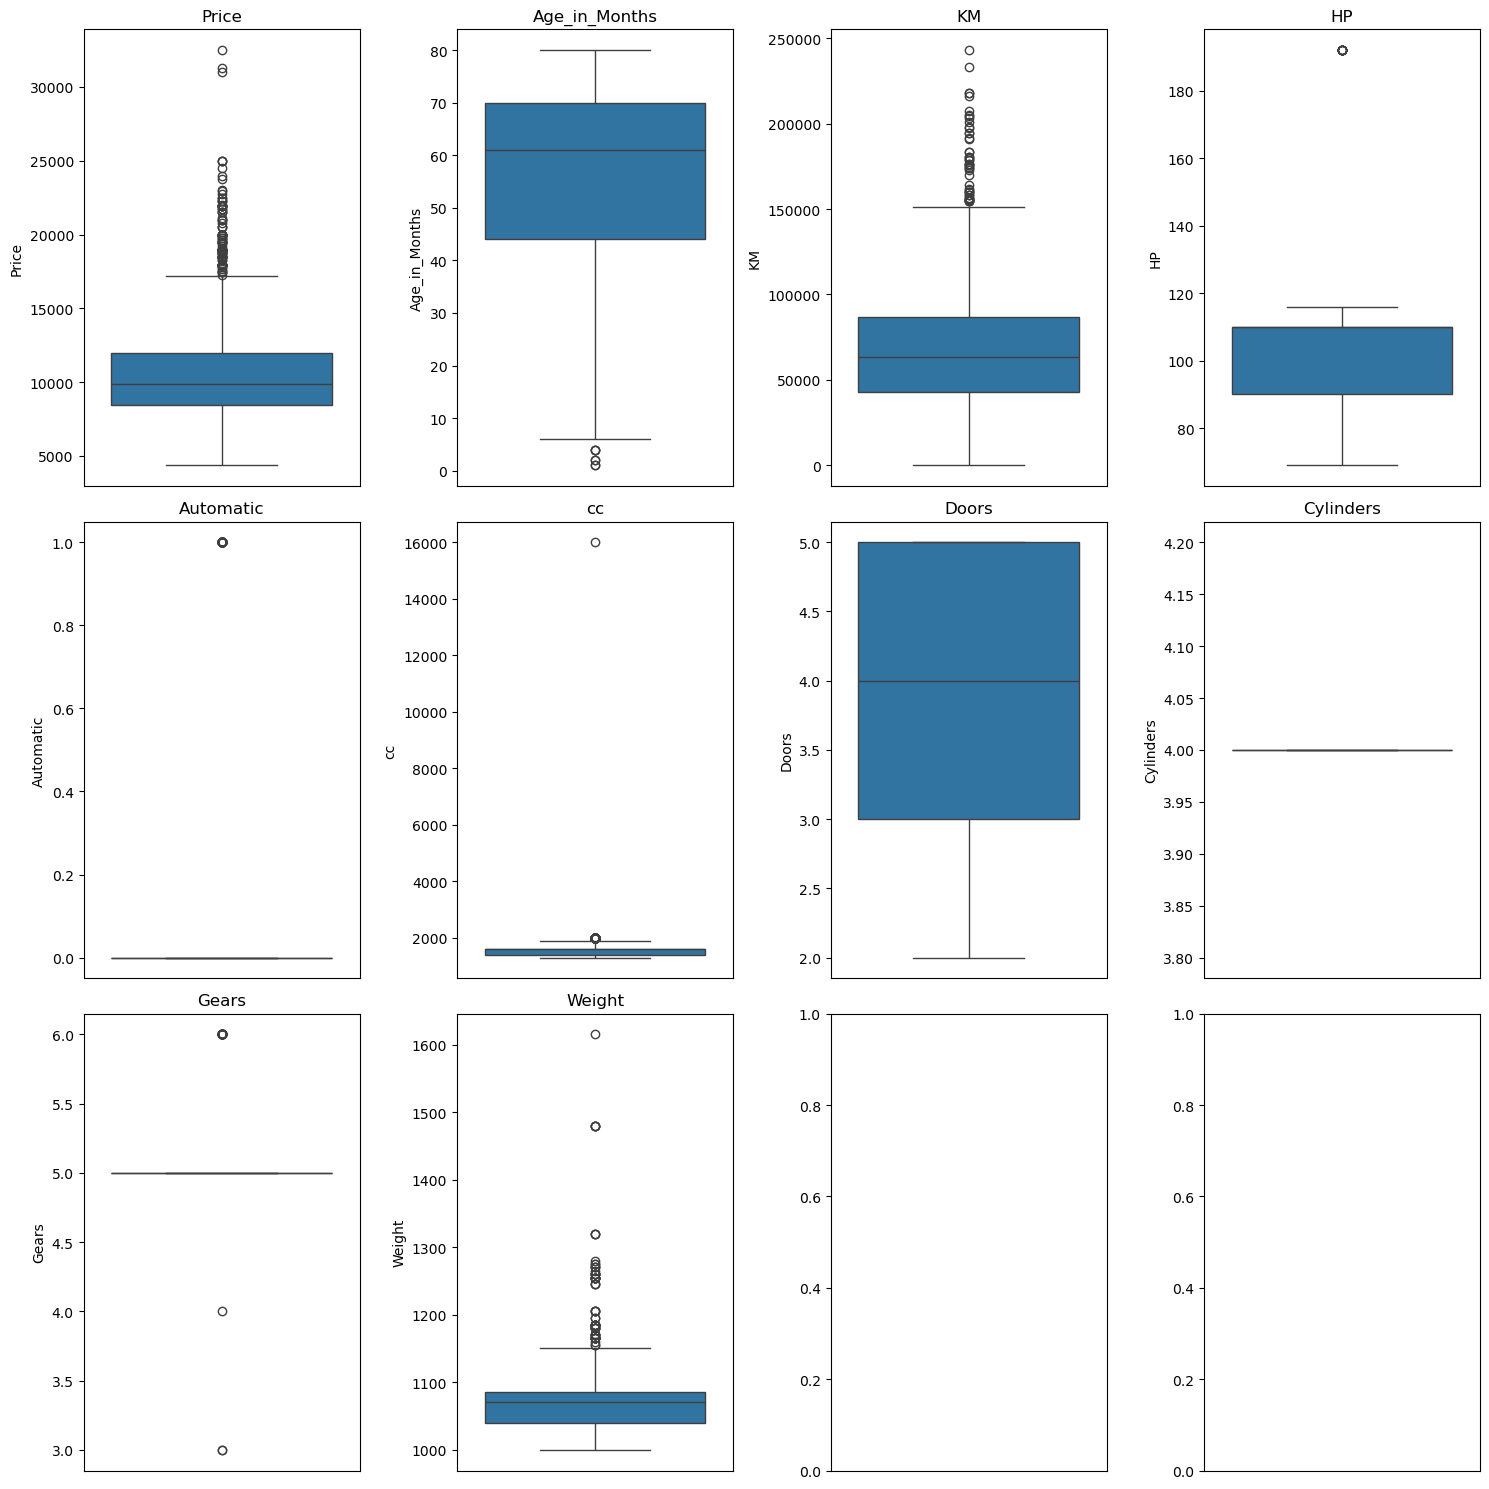

In [27]:
# Create a figure with 3 rows and 4 columns
fig, axs = plt.subplots(3, 4, figsize=(15, 15))

# Select numerical columns (both integers and floats)
numerical_col = data.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column and create a boxplot
for i, ax in enumerate(axs.flatten()):
    if i < len(numerical_col):  # Check to avoid index errors
        sns.boxplot(data=data[numerical_col[i]], ax=ax)
        ax.set_title(numerical_col[i])
        ax.set_xlabel('')

# Remove x-axis labels and ticks for better readability
plt.setp(axs, xticks=[])

# Improve layout
plt.tight_layout()
plt.show()

#### **Insights from Boxplots:**

1. **Price:**
   - There are several outliers in the upper range, with most prices clustered below \$20,000.
   - The median price is closer to the lower end of the range, indicating a skew towards more affordable vehicles.

2. **Age in Months:**
   - Most cars are between 40 to 80 months old.
   - There are a few outliers indicating cars much newer or slightly older than the typical range.

3. **KM (Mileage):**
   - Mileage shows a significant number of outliers above 150,000 km.
   - The central tendency is below 100,000 km, but there is considerable variability.

4. **HP (Horsepower):**
   - The distribution is relatively compact with few outliers, indicating most cars have similar horsepower, clustered around 100-110 HP.

5. **Automatic Transmission:**
   - The boxplot reveals a binary distribution with almost all cars being non-automatic. The single outlier shows a car with automatic transmission.

6. **Engine Size (cc):**
   - The distribution is highly skewed with a notable outlier at 16,000 cc, which could represent a data entry error or an extremely rare vehicle.
   - Most cars have engine sizes between 1,300 and 2,000 cc.

7. **Doors:**
   - Cars typically have 4 to 5 doors, with a broader range of variability in this feature.
   - The boxplot shows some cars with fewer doors, but these are less common.

8. **Cylinders:**
   - This feature has no variability; it appears all cars in this dataset have the same number of cylinders, which might suggest the column is not useful for distinguishing between cars.

9. **Gears:**
   - Similar to Cylinders, Gears show minimal variability, with most cars having 5 gears. There is one outlier with a different number of gears.

10. **Weight:**
    - The weight distribution shows many outliers on the lower end.
    - Most cars have a weight around 1,100 to 1,200 kg, with the outliers being lighter.

#### **Summary:**
- **Outliers:** Many features have significant outliers, especially in `Price`, `KM`, `cc`, and `Weight`.
- **Binary Features:** `Automatic` and `Gears` are almost binary, with minimal variation.
- **Cylinders:** Shows no variability and might not contribute much to analysis.
  
These insights suggest that certain features like `Cylinders` may not be as useful for predictive modeling, while others like `Price`, `KM`, and `cc` show significant variability that could be important for analysis. Additionally, outliers may need to be carefully considered or treated depending on the goals of your analysis.

#### Scatter plot to find the relationship between different variables

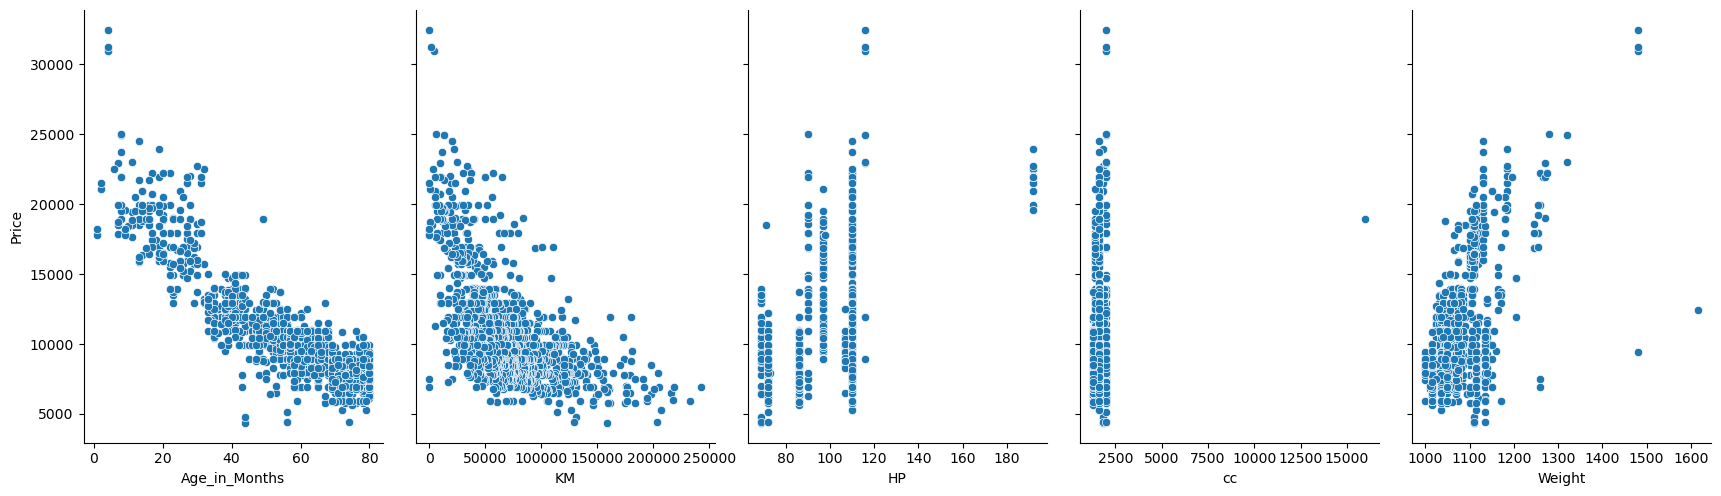

In [28]:
# Scatter plots to visualize relationships between Price and other continuous variables
sns.pairplot(data, x_vars=['Age_in_Months', 'KM', 'HP', 'cc', 'Weight'], y_vars='Price', height=5, aspect=0.7)
plt.show()

### **Insights: From Scatter plot**

1. **Age in Months vs. Price:**
   - There is a clear negative correlation between the age of the car and its price. As the car's age increases, the price tends to decrease.
   - Newer cars (lower age in months) are priced higher, while older cars are generally less expensive.

2. **KM (Mileage) vs. Price:**
   - A similar negative correlation is observed between mileage and price. Cars with higher mileage tend to have lower prices.
   - Cars with lower mileage are more likely to be priced higher.

3. **HP (Horsepower) vs. Price:**
   - There is a positive correlation between horsepower and price, although it is not as strong as the correlations with age or mileage.
   - Higher horsepower generally corresponds to a higher price, but the relationship is more scattered compared to other features.

4. **cc (Engine Size) vs. Price:**
   - The correlation between engine size and price is not as clear. There are some outliers with very large engine sizes, but the majority of cars fall into a similar range regardless of price.
   - This suggests that engine size might not be a strong predictor of price on its own, especially considering the potential data entry error or outliers.

5. **Weight vs. Price:**
   - The relationship between weight and price shows some positive correlation, but with a lot of scatter.
   - Heavier cars tend to be slightly more expensive, but this trend is not as pronounced as with age or mileage.

### **Summary:**
- **Strong Predictors:** `Age_in_Months` and `KM` are strong predictors of price, showing clear negative correlations.
- **Moderate Predictors:** `HP` and `Weight` have some positive correlation with price, but the relationship is less clear.
- **Less Clear Relationship:** `cc` does not show a strong correlation with price, and the data might be influenced by outliers or errors.

These insights suggest that while some features like age and mileage are very important in predicting price, others like engine size might need further investigation or cleansing to determine their usefulness.

As we know 'cylinders' column( variable) is not contributing much to analysis (no variability shown in boxplot), then we have to remove it from correlation matrix

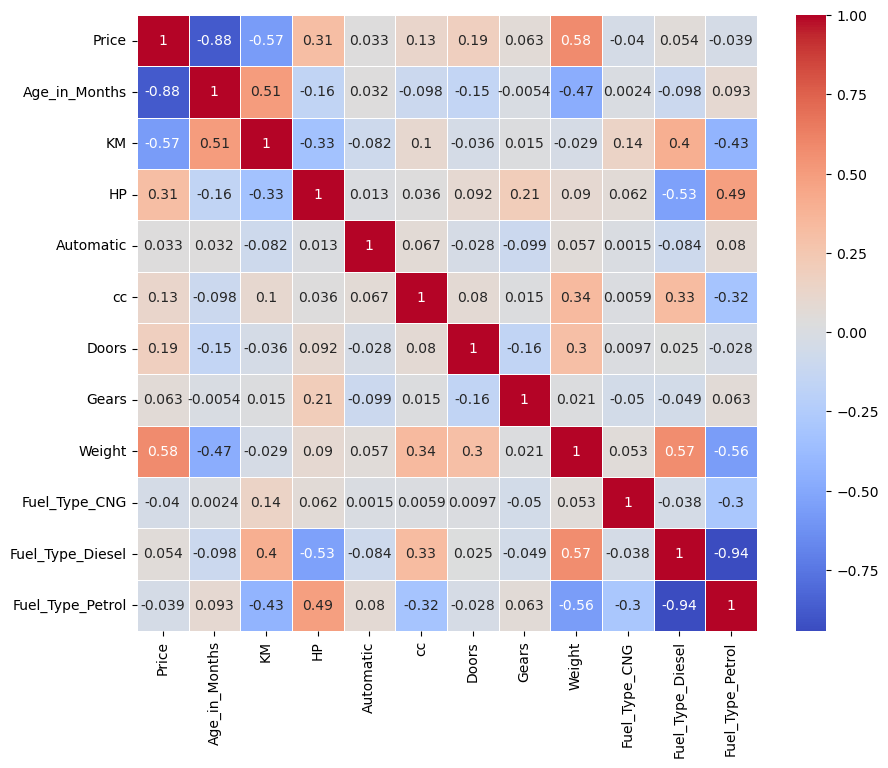

In [29]:
# Correlation matrix

# Drop the 'Cylinders' column from the data
data_no_cylinders = data.drop(columns=['Cylinders'])

plt.figure(figsize=(10, 8))
sns.heatmap(data_no_cylinders.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

The correlation matrix provides insights into the relationships between different features in the dataset, especially in relation to the target variable `Price`. Here are the key observations:

#### **Insights:**

1. **Price Correlations:**
   - **Age_in_Months (-0.88):** There is a strong negative correlation between the age of the car and its price. As the car gets older, its price decreases significantly.
   - **KM (-0.57):** There is also a moderate negative correlation between mileage and price. Higher mileage tends to reduce the price.
   - **Weight (0.58):** Weight has a moderate positive correlation with price, suggesting that heavier cars tend to be more expensive.
   - **HP (0.31):** Horsepower shows a moderate positive correlation with price, indicating that cars with higher horsepower are generally priced higher.

2. **Multicollinearity Concerns:**
   - **Fuel_Type_Diesel and Fuel_Type_Petrol (-0.94):** There is a very strong negative correlation between these two variables, indicating a potential multicollinearity issue. This is expected because a car can only be one type of fuel, not both.
   - **HP and Fuel_Type_Diesel (-0.53):** There's a strong negative correlation between horsepower and diesel fuel type, implying that diesel cars in the dataset generally have lower horsepower compared to non-diesel cars.
   - **HP and Fuel_Type_Petrol (0.49):** A moderate positive correlation exists between horsepower and petrol cars, indicating that petrol cars tend to have higher horsepower.

3. **Other Notable Correlations:**
   - **Age_in_Months and KM (0.51):** As expected, older cars tend to have higher mileage, showing a moderate positive correlation.
   - **Weight and Fuel_Type_Diesel (0.57):** Diesel cars tend to be heavier, which is consistent with their correlation with weight.
   - **Automatic and Price (-0.033):** The correlation between having an automatic transmission and price is very weak, indicating that this feature may not significantly impact the price.

#### **Summary:**
- **Key Predictors:** `Age_in_Months`, `KM`, `Weight`, and `HP` are key features influencing car price, with age and mileage being the strongest.
- **Multicollinearity:** The strong negative correlation between `Fuel_Type_Diesel` and `Fuel_Type_Petrol` suggests multicollinearity, which should be addressed in regression models.
- **Potential Outliers or Non-Contributing Features:** Columns like `Automatic`, `Doors`, and `Gears` show very weak correlations with price, indicating they might not be strong predictors or could be influenced by outliers.

These insights will help in refining the model by focusing on the most relevant features and addressing multicollinearity issues.

## Step 2: Data Splitting

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1148, 12), (288, 12))

## Step 3: Building the Multiple Linear Regression Model

### Model 1: Base Model with all Variables

In [31]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Model 1: Base model with all variables included
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:36:25   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_in_Months     -120.8305      2.887    -41.859      0.000    -126.494    -115.167
KM                  -0.0162      0.001    -11.053      0.000      -0.019      -0.013
HP                  14.0395      4.027      3.486      0.001       6.138      21.941
Automatic          148.8309    177.194      0.840      0.401    -198.833     496.495
cc                  -0.0304      0.091     -0.335      0.737      -0.208       0.147
Doors              -60.3110     44.951     -1.342      0.180    -148.506      27.884
Cylinders        -3384.8080    430.126     -7.869      0.000   -4228.737   -2540.879
Gears              551.6007    206.048      2.677      0.008     147.324     955.877
Weight              25.8850      1.497     17.295      0.000      22.948      28.821
Fuel_Type_CNG     -716.1540    225.585     -3.175      0.002   -1158.763    -273.545
Fuel_Type_Diesel  -784.7028    213.208     -3.680      0.000   -1203.028    -366.378
Fuel_Type_Petrol   654.6549    144.083      4.544      0.000     371.957     937.353
==============================================================================
Omnibus:                      212.816   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2408.915
Skew:                          -0.492   Prob(JB):                         0.00
Kurtosis:                      10.028   Cond. No.                     9.85e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.29e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Model 2: Feature Selection

In [32]:
# Model 2: Using feature selection (dropping low-impact features)

selected_features = ['Age_in_Months', 'KM', 'HP', 'Weight']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model2 = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1820.
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:36:29   Log-Likelihood:                -9889.1
No. Observations:                1148   AIC:                         1.979e+04
Df Residuals:                    1143   BIC:                         1.981e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5304.9714   1078.403     -4.919      0.000   -7420.843   -3189.100
Age_in_Months  -120.0254      2.900    -41.383      0.000    -125.716    -114.335
KM               -0.0202      0.001    -15.096      0.000      -0.023      -0.018
HP               29.0522      2.837     10.240      0.000      23.486      34.619
Weight           19.7691      0.925     21.364      0.000      17.954      21.585
==============================================================================
Omnibus:                      122.969   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              800.235
Skew:                          -0.229   Prob(JB):                    1.70e-174
Kurtosis:                       7.064   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3: Adding Interaction/Polynomial Terms

#### Generate Polynomial Features
We will create polynomial features for the variables Age_in_Months and KM.

In [38]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features for 'Age_in_Months' and 'KM'
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train[['Age_in_Months', 'KM']])
X_test_poly = poly.transform(X_test[['Age_in_Months', 'KM']])

# Convert the generated polynomial features into DataFrames
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(['Age_in_Months', 'KM']))
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(['Age_in_Months', 'KM']))


#### Combine Polynomial Features with the Selected Features
The selected features are combined with the polynomial features to form the final feature set. The final feature set

In [39]:
# Combine polynomial features with the selected features
X_train_combined = pd.concat([X_train_selected.reset_index(drop=True), X_train_poly_df.reset_index(drop=True)], axis=1)
X_test_combined = pd.concat([X_test_selected.reset_index(drop=True), X_test_poly_df.reset_index(drop=True)], axis=1)

# Ensure all column names are strings
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

#### Handle Missing Values
If there are any missing values, we'll handle them using the SimpleImputer.

In [40]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_combined = pd.DataFrame(imputer.fit_transform(X_train_combined), columns=X_train_combined.columns)
X_test_combined = pd.DataFrame(imputer.transform(X_test_combined), columns=X_test_combined.columns)

#### Fit the Model
Now, let's fit the model using these combined features.

In [42]:
# Align the indices
y_train = y_train.reset_index(drop=True)
X_train_combined = X_train_combined.reset_index(drop=True)


import statsmodels.api as sm

# Fit the model
model3 = sm.OLS(y_train, sm.add_constant(X_train_combined)).fit()

# View the summary of the model
model3_summary = model3.summary()
print(model3_summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1242.
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:52:39   Log-Likelihood:                -9798.5
No. Observations:                1148   AIC:                         1.961e+04
Df Residuals:                    1140   BIC:                         1.965e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              927.5369   1121.595  

## Step 4: Model Evaluation

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(sm.add_constant(X_test))
y_pred2 = model2.predict(sm.add_constant(X_test_selected))
y_pred3 = model3.predict(sm.add_constant(X_test_combined))

# Evaluation Metrics
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# Evaluate Model 1
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
print(f"Model 1 - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")

# Evaluate Model 2
mae2, mse2, rmse2, r22 = evaluate_model(y_test, y_pred2)
print(f"Model 2 - MAE: {mae2}, MSE: {mse2}, RMSE: {rmse2}, R2: {r22}")

# Evaluate Model 3
mae3, mse3, rmse3, r23 = evaluate_model(y_test, y_pred3)
print(f"Model 3 - MAE: {mae3}, MSE: {mse3}, RMSE: {rmse3}, R2: {r23}")

Model 1 - MAE: 990.8872739193937, MSE: 2203043.8231437127, RMSE: 1484.2654153296548, R2: 0.8348888040611074
Model 2 - MAE: 1001.2017466056082, MSE: 1993321.012972605, RMSE: 1411.850209113065, R2: 0.8506068681500931
Model 3 - MAE: 920.4109163336483, MSE: 1622427.1018676534, RMSE: 1273.7453049443022, R2: 0.8784041986369671


#### Key insights from the evaluation of the three models:

1. **Model 3 Performance**: 
   - **Lowest Errors**: Model 3 has the lowest Mean Absolute Error (MAE) of 920.41, indicating that on average, the predictions are off by about 920 units. It also has the lowest Mean Squared Error (MSE) of 1,622,427, and the lowest Root Mean Squared Error (RMSE) of 1,273.75. These metrics suggest that the predictions of Model 3 are more accurate than those of the other models.
   - **Highest R²**: Model 3 has the highest R² value of 0.8784, meaning it explains about 87.84% of the variance in the target variable. This suggests that the inclusion of interaction and/or polynomial terms in Model 3 significantly improved its ability to capture the relationship between the predictors and the target variable.

2. **Comparison with Other Models**:
   - **Model 1**: With an R² of 0.8349 and higher error metrics, Model 1 is the least accurate. This suggests that the basic linear model without interaction terms is not capturing all the nuances in the data.
   - **Model 2**: Model 2 performs better than Model 1 but still falls short of Model 3. The R² of 0.8506 and higher error metrics indicate that while some improvements were made, it still doesn’t capture the complexity of the relationships in the data as effectively as Model 3.

3. **Impact of Interaction/Polynomial Terms**:
   - The significant improvement in Model 3 demonstrates the importance of considering interaction and polynomial terms in the model. These terms allow the model to account for non-linear relationships and interactions between features, which appears to be critical in this dataset.

#### Conclusion:
Model 3, with its inclusion of interaction and/or polynomial terms, is the best-performing model. It should be preferred for making predictions, as it provides more accurate and reliable results. The results highlight the value of exploring more complex relationships in the data, beyond simple linear associations.

## Step 5: Applying Lasso and Ridge Regularization

In [44]:
from sklearn.linear_model import Ridge, Lasso

# Applying Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_selected, y_train)
ridge_pred = ridge.predict(X_test_selected)
mae_ridge, mse_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, ridge_pred)
print(f"Ridge - MAE: {mae_ridge}, MSE: {mse_ridge}, RMSE: {rmse_ridge}, R2: {r2_ridge}")

# Applying Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_selected, y_train)
lasso_pred = lasso.predict(X_test_selected)
mae_lasso, mse_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, lasso_pred)
print(f"Lasso - MAE: {mae_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}, R2: {r2_lasso}")

Ridge - MAE: 1001.2015192389424, MSE: 1993323.7034774844, RMSE: 1411.8511619421802, R2: 0.8506066665052263
Lasso - MAE: 1001.2012136556091, MSE: 1993323.3178870247, RMSE: 1411.8510253872485, R2: 0.8506066954040168


#### Key Insights
- Both models demonstrate similar performance metrics.
- Lasso regression slightly outperforms Ridge in R² and MSE, indicating better fit and predictive capability.

## Conclusion

In this multiple linear regression analysis of Toyota Corolla prices, we have explored the relationships between various attributes and the target variable. Through exploratory data analysis (EDA), we identified key features impacting price, leading to informed model selection.

We evaluated multiple models, including standard linear regression, Ridge regression, and Lasso regression. The performance metrics indicate that all models provide a good fit, with R² values exceeding 0.85. Among them, Lasso regression showed a slight edge in performance, evidenced by lower mean squared error (MSE) and a marginally higher R², suggesting its effectiveness in feature selection and regularization.

The results emphasize the importance of model selection and tuning in predictive analytics, highlighting how techniques like Ridge and Lasso can improve model performance and mitigate overfitting. 

## Interview Questions:

**1. What is Normalization & Standardization and how is it helpful?**

- **Normalization:** Rescales features to a range of [0, 1]. It's useful when the scale of variables differs significantly.

- **Standardization:** Rescales features to have a mean of 0 and a standard deviation of 1. It’s beneficial when data follows a normal distribution or when applying algorithms like MLR, which assume normally distributed data.

**2. What techniques can be used to address multicollinearity in multiple linear regression?**

**Addressing Multicollinearity:**

**Techniques:**

- **Variance Inflation Factor (VIF):** Identify and remove highly collinear variables.
- **Regularization (Lasso/Ridge):** Penalize the magnitude of coefficients to reduce the impact of multicollinearity.
- **Principal Component Analysis (PCA):** Transform correlated variables into a set of linearly uncorrelated components.

####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.